<a href="https://colab.research.google.com/github/aminatulmaimuna/Project-uas-bigdata/blob/main/Project_uas_bigdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving penyakit_tidak_menular_clean.xlsx to penyakit_tidak_menular_clean.xlsx


In [2]:
import pandas as pd

# Baca file Excel (gunakan file CSV jika format aslinya seperti itu)
df = pd.read_excel("penyakit_tidak_menular_clean.xlsx")

# Pisahkan data menjadi kolom berdasarkan koma
df_split = df.iloc[:, 0].str.split(",", expand=True)

# Ubah nama kolom
df_split.columns = [
    "no", "kode_kabupaten", "nama_kabupaten", "kode_kecamatan", "nama_kecamatan",
    "nama_puskesmas", "penyakit", "jumlah", "kode_salah", "satuan", "tahun"
]

# Bersihkan kolom 'jumlah'
df_split["jumlah"] = df_split["jumlah"].str.replace('"', '').str.strip()
df_split["jumlah"] = pd.to_numeric(df_split["jumlah"], errors='coerce')

# Hapus kolom tidak penting
df_cleaned = df_split.drop(columns=["no", "kode_salah"])


In [5]:
import pandas as pd

In [7]:
import pandas as pd

df = pd.read_excel("penyakit_tidak_menular_clean.xlsx")  # TANPA "/path/..."


In [8]:
df_split = df.iloc[:, 0].str.split(",", expand=True)

In [9]:
df_split.columns = [
    "no", "kode_kabupaten", "nama_kabupaten", "kode_kecamatan", "nama_kecamatan",
    "nama_puskesmas", "penyakit", "jumlah", "kode_salah", "satuan", "tahun"
]

In [10]:
df_split["jumlah"] = df_split["jumlah"].str.replace('"', '').str.strip()
df_split["jumlah"] = pd.to_numeric(df_split["jumlah"], errors='coerce')

In [11]:
df_cleaned = df_split.drop(columns=["no", "kode_salah"])

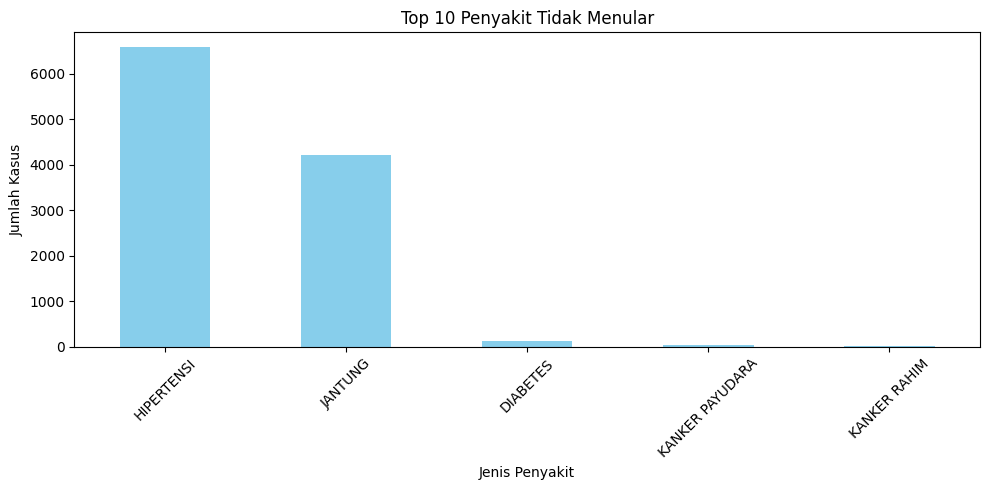

In [12]:
import matplotlib.pyplot as plt

top_penyakit = df_cleaned.groupby("penyakit")["jumlah"].sum().sort_values(ascending=False).head(10)
top_penyakit.plot(kind="bar", color="skyblue", figsize=(10,5))
plt.title("Top 10 Penyakit Tidak Menular")
plt.xlabel("Jenis Penyakit")
plt.ylabel("Jumlah Kasus")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


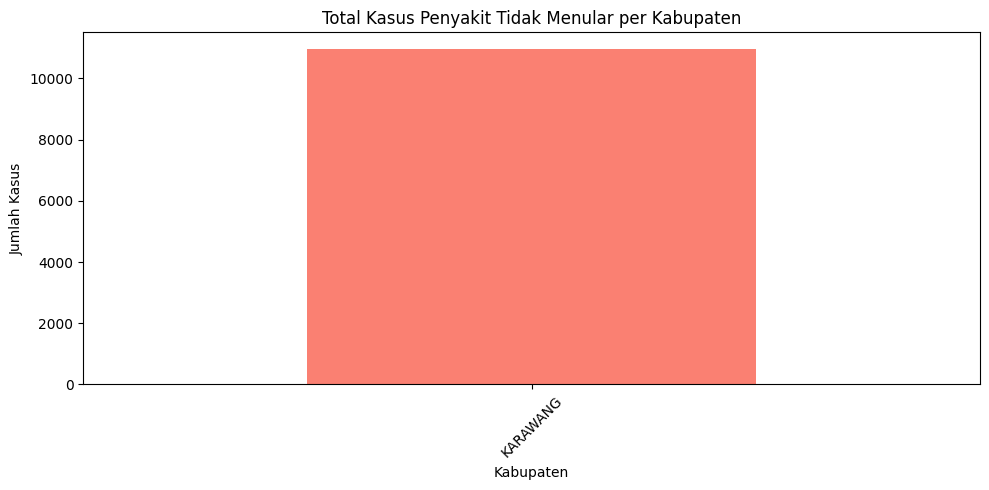

In [14]:
top_kabupaten = df_cleaned.groupby("nama_kabupaten")["jumlah"].sum().sort_values(ascending=False).head(10)
top_kabupaten.plot(kind="bar", color="salmon", figsize=(10,5))
plt.title("Total Kasus Penyakit Tidak Menular per Kabupaten")
plt.xlabel("Kabupaten")
plt.ylabel("Jumlah Kasus")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Encode kolom kategorik
le_kab = LabelEncoder()
le_penyakit = LabelEncoder()

X = le_kab.fit_transform(df_cleaned["nama_kabupaten"].astype(str)).reshape(-1, 1)
y = le_penyakit.fit_transform(df_cleaned["penyakit"].astype(str))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Prediksi dan akurasi
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))


Akurasi: 0.14


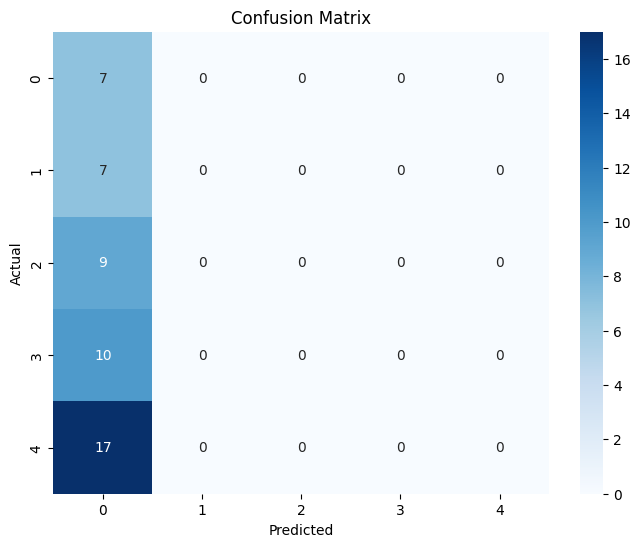

Classification Report:
                 precision    recall  f1-score   support

       DIABETES       0.14      1.00      0.25         7
     HIPERTENSI       0.00      0.00      0.00         7
        JANTUNG       0.00      0.00      0.00         9
KANKER PAYUDARA       0.00      0.00      0.00        10
   KANKER RAHIM       0.00      0.00      0.00        17

       accuracy                           0.14        50
      macro avg       0.03      0.20      0.05        50
   weighted avg       0.02      0.14      0.03        50



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le_penyakit.classes_))


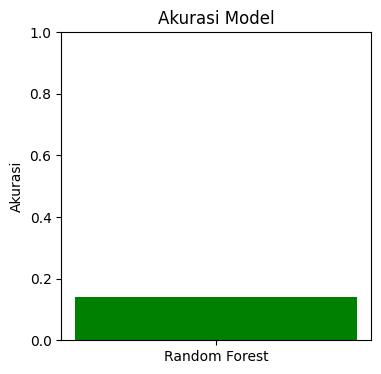

In [17]:
akurasi = accuracy_score(y_test, y_pred)
plt.figure(figsize=(4,4))
plt.bar(['Random Forest'], [akurasi], color='green')
plt.ylim(0,1)
plt.title("Akurasi Model")
plt.ylabel("Akurasi")
plt.show()
